<a href="https://colab.research.google.com/github/jakenowo/G14_Project/blob/main/G14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSC 522 Project - Group 14**

Note: [alldata.csv](https://www.kaggle.com/sl6149/data-scientist-job-market-in-the-us) needs to be uploaded to the session before running the code.

Currently the code contains some test cells and code is not completely commented. This will be remedied prior to the final report.

In [ ]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

!pip install spacy
!python -m spacy download en_core_web_sm
import spacy

!pip install contractions
import contractions

from google.colab import drive
drive.mount('/content/drive/')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 327kB 4.1MB/s 
     |████████████████████████████████| 266kB 6.4MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85404 sha256=6828fd017b21ef7448afddfcdbaedf1993a01fe969ef859f86f8aa75e7d3621b
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
Mounted at /content/drive/


In [ ]:
df_original = pd.read_csv('/content/alldata.csv', engine='python', error_bad_lines=False)
df_original.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [ ]:
print(df_original['description'][0])

Development Director
ALS Therapy Development Institute has an immediate opening for Development Directors. Reporting directly to the Senior Development Director, the Development Director at ALS TDI is a senior fundraising position working to identifying potential prospects and cultivating solicitation strategies and in closing asks with donors including individuals and corporations by building networks via events, generating awareness of ALS TDI; outreach including attending and speaking at events as well as personally cultivates relationships with patients, prospects and donors. This position will be responsible for generating and managing a portfolio of at least two million to five million dollars per year. This position will be located in Atlanta, GA.

Requirements:
Bachelor's Degree requiredMinimum 6-8 years' experience in fundraising and business developmentSuccessful track recording in fundraising with major donors or scientific sales preferredDemonstrated ability to work indepen

In [ ]:
print(df_original['position'][:10])

0                                 Development Director
1    An Ostentatiously-Excitable Principal Research...
2                                       Data Scientist
3                                         Data Analyst
4    Assistant Professor -TT - Signal Processing & ...
5                          Manager of Data Engineering
6         Product Specialist - Periscope, New Ventures
7    Junior to Mid-level Engineer, Geologist or Env...
8                        Analyst - CIB Credit Research
9    Senior Associate - Cognitive Data Scientist Na...
Name: position, dtype: object


In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [ ]:
df_original['reviews'].isnull().values.sum()
df = df_original.drop(['reviews'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   position     6953 non-null   object
 1   company      6953 non-null   object
 2   description  6953 non-null   object
 3   location     6953 non-null   object
dtypes: object(4)
memory usage: 217.8+ KB


In [ ]:
df.isnull().sum()

position       11
company        11
description    11
location       11
dtype: int64

In [ ]:
df.dropna()

,position,company,description,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA"
...,...,...,...,...
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...","Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,"Sunnyvale, CA"


In [ ]:
position_df = df['position']
position_df = position_df.to_frame()

position_df.sample(10, random_state = 5)

,position
5636,Principal Scientist
1499,"Software Engineer, Data Visualization"
6761,Computer Vision Scientist/Engineer
5720,SDE III - Bits | Twitch
2433,Market Research Analyst
5948,Sr. Data Engineer
2157,Technology Consultant
5840,Data Scientist (All Levels)
51,"Director, Data Scientist"
1393,Data Scientist


In [ ]:
position_df['pos'] = position_df['position'].astype(str).str.split()
position_df['pos'] = position_df['pos'].apply(lambda x: [contractions.fix(word) for word in x])
print(position_df.shape)
position_df.sample(10, random_state = 5)

(6964, 2)


,position,pos
5636,Principal Scientist,"[Principal, Scientist]"
1499,"Software Engineer, Data Visualization","[Software, Engineer,, Data, Visualization]"
6761,Computer Vision Scientist/Engineer,"[Computer, Vision, Scientist/Engineer]"
5720,SDE III - Bits | Twitch,"[SDE, III, -, Bits, |, Twitch]"
2433,Market Research Analyst,"[Market, Research, Analyst]"
5948,Sr. Data Engineer,"[Sr., Data, Engineer]"
2157,Technology Consultant,"[Technology, Consultant]"
5840,Data Scientist (All Levels),"[Data, Scientist, (All, Levels)]"
51,"Director, Data Scientist","[Director,, Data, Scientist]"
1393,Data Scientist,"[Data, Scientist]"


In [ ]:
position_df['pos_str'] = [' '.join(map(str, l)) for l in position_df['pos']]
position_df.sample(10, random_state = 5)

,position,pos,pos_str
5636,Principal Scientist,"[Principal, Scientist]",Principal Scientist
1499,"Software Engineer, Data Visualization","[Software, Engineer,, Data, Visualization]","Software Engineer, Data Visualization"
6761,Computer Vision Scientist/Engineer,"[Computer, Vision, Scientist/Engineer]",Computer Vision Scientist/Engineer
5720,SDE III - Bits | Twitch,"[SDE, III, -, Bits, |, Twitch]",SDE III - Bits | Twitch
2433,Market Research Analyst,"[Market, Research, Analyst]",Market Research Analyst
5948,Sr. Data Engineer,"[Sr., Data, Engineer]",Sr. Data Engineer
2157,Technology Consultant,"[Technology, Consultant]",Technology Consultant
5840,Data Scientist (All Levels),"[Data, Scientist, (All, Levels)]",Data Scientist (All Levels)
51,"Director, Data Scientist","[Director,, Data, Scientist]","Director, Data Scientist"
1393,Data Scientist,"[Data, Scientist]",Data Scientist


In [ ]:
position_df['re_pos'] = position_df['pos_str'].str.lower()
position_df['re_pos'] = position_df['pos_str'].apply(lambda x: re.sub(r'[^\w\d\s\'\,\.\;]+', ' ', x))

position_df.sample(10, random_state = 5)

,position,pos,pos_str,re_pos
5636,Principal Scientist,"[Principal, Scientist]",Principal Scientist,Principal Scientist
1499,"Software Engineer, Data Visualization","[Software, Engineer,, Data, Visualization]","Software Engineer, Data Visualization","Software Engineer, Data Visualization"
6761,Computer Vision Scientist/Engineer,"[Computer, Vision, Scientist/Engineer]",Computer Vision Scientist/Engineer,Computer Vision Scientist Engineer
5720,SDE III - Bits | Twitch,"[SDE, III, -, Bits, |, Twitch]",SDE III - Bits | Twitch,SDE III Bits Twitch
2433,Market Research Analyst,"[Market, Research, Analyst]",Market Research Analyst,Market Research Analyst
5948,Sr. Data Engineer,"[Sr., Data, Engineer]",Sr. Data Engineer,Sr. Data Engineer
2157,Technology Consultant,"[Technology, Consultant]",Technology Consultant,Technology Consultant
5840,Data Scientist (All Levels),"[Data, Scientist, (All, Levels)]",Data Scientist (All Levels),Data Scientist All Levels
51,"Director, Data Scientist","[Director,, Data, Scientist]","Director, Data Scientist","Director, Data Scientist"
1393,Data Scientist,"[Data, Scientist]",Data Scientist,Data Scientist


In [ ]:
position_df['tokenized_title'] = position_df['re_pos'].apply(word_tokenize)
position_df.sample(10, random_state = 5)

,position,pos,pos_str,re_pos,tokenized_title
5636,Principal Scientist,"[Principal, Scientist]",Principal Scientist,Principal Scientist,"[Principal, Scientist]"
1499,"Software Engineer, Data Visualization","[Software, Engineer,, Data, Visualization]","Software Engineer, Data Visualization","Software Engineer, Data Visualization","[Software, Engineer, ,, Data, Visualization]"
6761,Computer Vision Scientist/Engineer,"[Computer, Vision, Scientist/Engineer]",Computer Vision Scientist/Engineer,Computer Vision Scientist Engineer,"[Computer, Vision, Scientist, Engineer]"
5720,SDE III - Bits | Twitch,"[SDE, III, -, Bits, |, Twitch]",SDE III - Bits | Twitch,SDE III Bits Twitch,"[SDE, III, Bits, Twitch]"
2433,Market Research Analyst,"[Market, Research, Analyst]",Market Research Analyst,Market Research Analyst,"[Market, Research, Analyst]"
5948,Sr. Data Engineer,"[Sr., Data, Engineer]",Sr. Data Engineer,Sr. Data Engineer,"[Sr., Data, Engineer]"
2157,Technology Consultant,"[Technology, Consultant]",Technology Consultant,Technology Consultant,"[Technology, Consultant]"
5840,Data Scientist (All Levels),"[Data, Scientist, (All, Levels)]",Data Scientist (All Levels),Data Scientist All Levels,"[Data, Scientist, All, Levels]"
51,"Director, Data Scientist","[Director,, Data, Scientist]","Director, Data Scientist","Director, Data Scientist","[Director, ,, Data, Scientist]"
1393,Data Scientist,"[Data, Scientist]",Data Scientist,Data Scientist,"[Data, Scientist]"


In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
position_df['tokenized_title'] = position_df['tokenized_title'].apply(lambda x: [word for word in x if word not in stop_words])
position_df['tokenized_title_join'] = [' '.join(map(str, l)) for l in position_df['tokenized_title']]

position_df.sample(10, random_state = 5)

,position,pos,pos_str,re_pos,tokenized_title,tokenized_title_join
5636,Principal Scientist,"[Principal, Scientist]",Principal Scientist,Principal Scientist,"[Principal, Scientist]",Principal Scientist
1499,"Software Engineer, Data Visualization","[Software, Engineer,, Data, Visualization]","Software Engineer, Data Visualization","Software Engineer, Data Visualization","[Software, Engineer, ,, Data, Visualization]","Software Engineer , Data Visualization"
6761,Computer Vision Scientist/Engineer,"[Computer, Vision, Scientist/Engineer]",Computer Vision Scientist/Engineer,Computer Vision Scientist Engineer,"[Computer, Vision, Scientist, Engineer]",Computer Vision Scientist Engineer
5720,SDE III - Bits | Twitch,"[SDE, III, -, Bits, |, Twitch]",SDE III - Bits | Twitch,SDE III Bits Twitch,"[SDE, III, Bits, Twitch]",SDE III Bits Twitch
2433,Market Research Analyst,"[Market, Research, Analyst]",Market Research Analyst,Market Research Analyst,"[Market, Research, Analyst]",Market Research Analyst
5948,Sr. Data Engineer,"[Sr., Data, Engineer]",Sr. Data Engineer,Sr. Data Engineer,"[Sr., Data, Engineer]",Sr. Data Engineer
2157,Technology Consultant,"[Technology, Consultant]",Technology Consultant,Technology Consultant,"[Technology, Consultant]",Technology Consultant
5840,Data Scientist (All Levels),"[Data, Scientist, (All, Levels)]",Data Scientist (All Levels),Data Scientist All Levels,"[Data, Scientist, All, Levels]",Data Scientist All Levels
51,"Director, Data Scientist","[Director,, Data, Scientist]","Director, Data Scientist","Director, Data Scientist","[Director, ,, Data, Scientist]","Director , Data Scientist"
1393,Data Scientist,"[Data, Scientist]",Data Scientist,Data Scientist,"[Data, Scientist]",Data Scientist


In [ ]:
nlp = spacy.load('en_core_web_sm')
nlp

In [ ]:
for sentence in position_df['tokenized_title_join'].sample(10, random_state = 4):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)

  for chunk in sentence_doc.noun_chunks:
    print ("Chunked noun phrases found: ",chunk)
  print()

Sentence is:  Senior Clinical Project Assistant
Chunked noun phrases found:  Senior Clinical Project Assistant

Sentence is:  Senior Statistical Analyst
Chunked noun phrases found:  Senior Statistical Analyst

Sentence is:  Vice President , Data Science , Banking Wealth , US
Chunked noun phrases found:  Vice President
Chunked noun phrases found:  Data Science
Chunked noun phrases found:  Banking Wealth
Chunked noun phrases found:  US

Sentence is:  Senior Sales Account Executive
Chunked noun phrases found:  Senior Sales Account Executive

Sentence is:  Associate PHC Data Scientist PHC Data Scientist Analytics
Chunked noun phrases found:  Associate PHC Data Scientist PHC Data Scientist Analytics

Sentence is:  Research Data Analyst Senior Statistician
Chunked noun phrases found:  Research Data Analyst Senior Statistician

Sentence is:  Principal Data Scientist
Chunked noun phrases found:  Principal Data Scientist

Sentence is:  Data Scientist GEOINT
Chunked noun phrases found:  Data Sci

# **Cleaning and Tokenizing Descriptions**

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
# Get descriptions from dataset
descriptions = df['description']
descriptions

0       Development Director\nALS Therapy Development ...
1       Job Description\n\n"The road that leads to acc...
2       Growing company located in the Atlanta, GA are...
3       DEPARTMENT: Program OperationsPOSITION LOCATIO...
4       DESCRIPTION\nThe Emory University Department o...
                              ...                        
6959    Are you data-driven? We at NetApp believe in t...
6960    Pharmacyclics is committed to the development ...
6961    Oath, a subsidiary of Verizon, is a values-led...
6962    We are the Bing Core Relevance team responsibl...
6963    Comcast’s Technology &amp; Product organizatio...
Name: description, Length: 6964, dtype: object

In [ ]:
# Turn into dataframe
desc_df = df['description'].to_frame()

# Add new column with descriptions in lowercase
desc_df['lower'] = df['description'].str.lower()
desc_df.sample(10, random_state = 5)

,description,lower
5636,I: Job\n\nContributes to the strategic directi...,i: job\n\ncontributes to the strategic directi...
1499,"About our teams:\nAt Tempus, products are owne...","about our teams:\nat tempus, products are owne..."
6761,"Baidu USA, located in Silicon Valley, is looki...","baidu usa, located in silicon valley, is looki..."
5720,Job Description\n\n\nTwitch is building the fu...,job description\n\n\ntwitch is building the fu...
2433,We are seeking qualified Analysts to join our ...,we are seeking qualified analysts to join our ...
5948,We’re LendingHome. We’re on a mission to revol...,we’re lendinghome. we’re on a mission to revol...
2157,Who We Are\nBusiness has changed - so should c...,who we are\nbusiness has changed - so should c...
5840,Finding a good job is very good.\nFinding a go...,finding a good job is very good.\nfinding a go...
51,Innovate. Collaborate. Shine. Lighthouse — KPM...,innovate. collaborate. shine. lighthouse — kpm...
1393,"What We Do\n\nAt Uptake, our purpose-built pro...","what we do\n\nat uptake, our purpose-built pro..."


In [ ]:
# Split strings and reassemble contractions
desc_df['pos'] = desc_df['lower'].astype(str).str.split()
desc_df['pos'] = desc_df['pos'].apply(lambda x: [contractions.fix(word) for word in x])
desc_df.sample(10, random_state = 5)

,description,lower,pos
5636,I: Job\n\nContributes to the strategic directi...,i: job\n\ncontributes to the strategic directi...,"[i:, job, contributes, to, the, strategic, dir..."
1499,"About our teams:\nAt Tempus, products are owne...","about our teams:\nat tempus, products are owne...","[about, our, teams:, at, tempus,, products, ar..."
6761,"Baidu USA, located in Silicon Valley, is looki...","baidu usa, located in silicon valley, is looki...","[baidu, usa,, located, in, silicon, valley,, i..."
5720,Job Description\n\n\nTwitch is building the fu...,job description\n\n\ntwitch is building the fu...,"[job, description, twitch, is, building, the, ..."
2433,We are seeking qualified Analysts to join our ...,we are seeking qualified analysts to join our ...,"[we, are, seeking, qualified, analysts, to, jo..."
5948,We’re LendingHome. We’re on a mission to revol...,we’re lendinghome. we’re on a mission to revol...,"[we are, lendinghome., we are, on, a, mission,..."
2157,Who We Are\nBusiness has changed - so should c...,who we are\nbusiness has changed - so should c...,"[who, we, are, business, has, changed, -, so, ..."
5840,Finding a good job is very good.\nFinding a go...,finding a good job is very good.\nfinding a go...,"[finding, a, good, job, is, very, good., findi..."
51,Innovate. Collaborate. Shine. Lighthouse — KPM...,innovate. collaborate. shine. lighthouse — kpm...,"[innovate., collaborate., shine., lighthouse, ..."
1393,"What We Do\n\nAt Uptake, our purpose-built pro...","what we do\n\nat uptake, our purpose-built pro...","[what, we, do, at, uptake,, our, purpose-built..."


In [ ]:
# Combine split strings
desc_df['pos_str'] = [' '.join(map(str, l)) for l in desc_df['pos']]
desc_df.sample(10, random_state = 5)

,description,lower,pos,pos_str
5636,I: Job\n\nContributes to the strategic directi...,i: job\n\ncontributes to the strategic directi...,"[i:, job, contributes, to, the, strategic, dir...",i: job contributes to the strategic direction ...
1499,"About our teams:\nAt Tempus, products are owne...","about our teams:\nat tempus, products are owne...","[about, our, teams:, at, tempus,, products, ar...","about our teams: at tempus, products are owned..."
6761,"Baidu USA, located in Silicon Valley, is looki...","baidu usa, located in silicon valley, is looki...","[baidu, usa,, located, in, silicon, valley,, i...","baidu usa, located in silicon valley, is looki..."
5720,Job Description\n\n\nTwitch is building the fu...,job description\n\n\ntwitch is building the fu...,"[job, description, twitch, is, building, the, ...",job description twitch is building the future ...
2433,We are seeking qualified Analysts to join our ...,we are seeking qualified analysts to join our ...,"[we, are, seeking, qualified, analysts, to, jo...",we are seeking qualified analysts to join our ...
5948,We’re LendingHome. We’re on a mission to revol...,we’re lendinghome. we’re on a mission to revol...,"[we are, lendinghome., we are, on, a, mission,...",we are lendinghome. we are on a mission to rev...
2157,Who We Are\nBusiness has changed - so should c...,who we are\nbusiness has changed - so should c...,"[who, we, are, business, has, changed, -, so, ...",who we are business has changed - so should co...
5840,Finding a good job is very good.\nFinding a go...,finding a good job is very good.\nfinding a go...,"[finding, a, good, job, is, very, good., findi...",finding a good job is very good. finding a goo...
51,Innovate. Collaborate. Shine. Lighthouse — KPM...,innovate. collaborate. shine. lighthouse — kpm...,"[innovate., collaborate., shine., lighthouse, ...",innovate. collaborate. shine. lighthouse — kpm...
1393,"What We Do\n\nAt Uptake, our purpose-built pro...","what we do\n\nat uptake, our purpose-built pro...","[what, we, do, at, uptake,, our, purpose-built...","what we do at uptake, our purpose-built produc..."


In [ ]:
# Use regular expression to remove punctuation
desc_df['cleaner'] = desc_df['pos_str'].apply(lambda x: re.sub(r'[^\w\d\s\'\,\.\;]+', ' ', x))
desc_df.sample(10, random_state = 5)

,description,lower,pos,pos_str,cleaner
5636,I: Job\n\nContributes to the strategic directi...,i: job\n\ncontributes to the strategic directi...,"[i:, job, contributes, to, the, strategic, dir...",i: job contributes to the strategic direction ...,i job contributes to the strategic direction ...
1499,"About our teams:\nAt Tempus, products are owne...","about our teams:\nat tempus, products are owne...","[about, our, teams:, at, tempus,, products, ar...","about our teams: at tempus, products are owned...","about our teams at tempus, products are owned..."
6761,"Baidu USA, located in Silicon Valley, is looki...","baidu usa, located in silicon valley, is looki...","[baidu, usa,, located, in, silicon, valley,, i...","baidu usa, located in silicon valley, is looki...","baidu usa, located in silicon valley, is looki..."
5720,Job Description\n\n\nTwitch is building the fu...,job description\n\n\ntwitch is building the fu...,"[job, description, twitch, is, building, the, ...",job description twitch is building the future ...,job description twitch is building the future ...
2433,We are seeking qualified Analysts to join our ...,we are seeking qualified analysts to join our ...,"[we, are, seeking, qualified, analysts, to, jo...",we are seeking qualified analysts to join our ...,we are seeking qualified analysts to join our ...
5948,We’re LendingHome. We’re on a mission to revol...,we’re lendinghome. we’re on a mission to revol...,"[we are, lendinghome., we are, on, a, mission,...",we are lendinghome. we are on a mission to rev...,we are lendinghome. we are on a mission to rev...
2157,Who We Are\nBusiness has changed - so should c...,who we are\nbusiness has changed - so should c...,"[who, we, are, business, has, changed, -, so, ...",who we are business has changed - so should co...,who we are business has changed so should co...
5840,Finding a good job is very good.\nFinding a go...,finding a good job is very good.\nfinding a go...,"[finding, a, good, job, is, very, good., findi...",finding a good job is very good. finding a goo...,finding a good job is very good. finding a goo...
51,Innovate. Collaborate. Shine. Lighthouse — KPM...,innovate. collaborate. shine. lighthouse — kpm...,"[innovate., collaborate., shine., lighthouse, ...",innovate. collaborate. shine. lighthouse — kpm...,innovate. collaborate. shine. lighthouse kpm...
1393,"What We Do\n\nAt Uptake, our purpose-built pro...","what we do\n\nat uptake, our purpose-built pro...","[what, we, do, at, uptake,, our, purpose-built...","what we do at uptake, our purpose-built produc...","what we do at uptake, our purpose built produc..."


In [ ]:
# Tokenize
desc_df['tokenized'] = desc_df['cleaner'].apply(word_tokenize)

# Remove stopwords
desc_df['tokenized'] = desc_df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
desc_df.sample(10, random_state = 5)

,description,lower,pos,pos_str,cleaner,tokenized
5636,I: Job\n\nContributes to the strategic directi...,i: job\n\ncontributes to the strategic directi...,"[i:, job, contributes, to, the, strategic, dir...",i: job contributes to the strategic direction ...,i job contributes to the strategic direction ...,"[job, contributes, strategic, direction, proje..."
1499,"About our teams:\nAt Tempus, products are owne...","about our teams:\nat tempus, products are owne...","[about, our, teams:, at, tempus,, products, ar...","about our teams: at tempus, products are owned...","about our teams at tempus, products are owned...","[teams, tempus, ,, products, owned, developed,..."
6761,"Baidu USA, located in Silicon Valley, is looki...","baidu usa, located in silicon valley, is looki...","[baidu, usa,, located, in, silicon, valley,, i...","baidu usa, located in silicon valley, is looki...","baidu usa, located in silicon valley, is looki...","[baidu, usa, ,, located, silicon, valley, ,, l..."
5720,Job Description\n\n\nTwitch is building the fu...,job description\n\n\ntwitch is building the fu...,"[job, description, twitch, is, building, the, ...",job description twitch is building the future ...,job description twitch is building the future ...,"[job, description, twitch, building, future, i..."
2433,We are seeking qualified Analysts to join our ...,we are seeking qualified analysts to join our ...,"[we, are, seeking, qualified, analysts, to, jo...",we are seeking qualified analysts to join our ...,we are seeking qualified analysts to join our ...,"[seeking, qualified, analysts, join, team, ., ..."
5948,We’re LendingHome. We’re on a mission to revol...,we’re lendinghome. we’re on a mission to revol...,"[we are, lendinghome., we are, on, a, mission,...",we are lendinghome. we are on a mission to rev...,we are lendinghome. we are on a mission to rev...,"[lendinghome, ., mission, revolutionize, world..."
2157,Who We Are\nBusiness has changed - so should c...,who we are\nbusiness has changed - so should c...,"[who, we, are, business, has, changed, -, so, ...",who we are business has changed - so should co...,who we are business has changed so should co...,"[business, changed, consulting, ., strategists..."
5840,Finding a good job is very good.\nFinding a go...,finding a good job is very good.\nfinding a go...,"[finding, a, good, job, is, very, good., findi...",finding a good job is very good. finding a goo...,finding a good job is very good. finding a goo...,"[finding, good, job, good, ., finding, good, j..."
51,Innovate. Collaborate. Shine. Lighthouse — KPM...,innovate. collaborate. shine. lighthouse — kpm...,"[innovate., collaborate., shine., lighthouse, ...",innovate. collaborate. shine. lighthouse — kpm...,innovate. collaborate. shine. lighthouse kpm...,"[innovate, ., collaborate, ., shine, ., lighth..."
1393,"What We Do\n\nAt Uptake, our purpose-built pro...","what we do\n\nat uptake, our purpose-built pro...","[what, we, do, at, uptake,, our, purpose-built...","what we do at uptake, our purpose-built produc...","what we do at uptake, our purpose built produc...","[uptake, ,, purpose, built, products, ingest, ..."


# **Add Skill Features**

In [ ]:
# List of skills we want to look for
skills = {'python', '.net', 'java', 'javascript', 'typescript', 'r', 'sql', 'c', 'scala', 'aws', 'azure', 'sas', 'hadoop', 'spark', 'ajax', 'css', 'html', 'tensorflow', 'docker', 'keras', 'caffe', 'excel', 'matlab', 'mongodb', 'pytorch', 'nosql', 'tableau', 'hive', 'git', 'postgresql', 'powershell', 'xml', 'ruby', 'mysql', 'ssh', 'dynamodb', 'haskell', 'splunk', 'xquery', 'oracle', 'swift', 'tomcat', 'postgis', 'julia', 'neo4j', 'rapidminer', 'qlikview', 'spss', 'stata', 'octave', 'cassandra', 'elasticsearch', 'hbase'}
skills

{'.net',
 'ajax',
 'aws',
 'azure',
 'c',
 'caffe',
 'cassandra',
 'css',
 'docker',
 'dynamodb',
 'elasticsearch',
 'excel',
 'git',
 'hadoop',
 'haskell',
 'hbase',
 'hive',
 'html',
 'java',
 'javascript',
 'julia',
 'keras',
 'matlab',
 'mongodb',
 'mysql',
 'neo4j',
 'nosql',
 'octave',
 'oracle',
 'postgis',
 'postgresql',
 'powershell',
 'python',
 'pytorch',
 'qlikview',
 'r',
 'rapidminer',
 'ruby',
 'sas',
 'scala',
 'spark',
 'splunk',
 'spss',
 'sql',
 'ssh',
 'stata',
 'swift',
 'tableau',
 'tensorflow',
 'tomcat',
 'typescript',
 'xml',
 'xquery'}

In [ ]:
# Build new dataframe with clean titles and description tokens
skills_df = pd.DataFrame({'title': position_df['tokenized_title_join'], 'desc_tokens': desc_df['tokenized']})

# Create new attribute for each skill. 1 if skill in description tokens, 0 otherwise
for skill in skills:
  skills_df[skill] = skills_df.apply(lambda x: int(skill in x['desc_tokens']), axis=1)

skills_df.sample(10, random_state = 5)

,title,desc_tokens,c,tomcat,xquery,ajax,scala,dynamodb,swift,javascript,ruby,qlikview,sas,haskell,mongodb,elasticsearch,css,aws,tensorflow,git,azure,matlab,pytorch,caffe,mysql,hbase,postgresql,excel,java,xml,spss,cassandra,python,tableau,keras,julia,splunk,sql,spark,ssh,docker,stata,postgis,oracle,.net,hive,typescript,html,r,powershell,hadoop,nosql,octave,rapidminer,neo4j
5636,Principal Scientist,"[job, contributes, strategic, direction, proje...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1499,"Software Engineer , Data Visualization","[teams, tempus, ,, products, owned, developed,...",0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6761,Computer Vision Scientist Engineer,"[baidu, usa, ,, located, silicon, valley, ,, l...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5720,SDE III Bits Twitch,"[job, description, twitch, building, future, i...",0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2433,Market Research Analyst,"[seeking, qualified, analysts, join, team, ., ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5948,Sr. Data Engineer,"[lendinghome, ., mission, revolutionize, world...",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2157,Technology Consultant,"[business, changed, consulting, ., strategists...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5840,Data Scientist All Levels,"[finding, good, job, good, ., finding, good, j...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
51,"Director , Data Scientist","[innovate, ., collaborate, ., shine, ., lighth...",0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1393,Data Scientist,"[uptake, ,, purpose, built, products, ingest, ...",1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Remove entries that have none of the specified skills
skills_df = skills_df.loc[skills_df.sum(axis=1) > 0,]
skills_df.sample(10, random_state = 5)

,title,desc_tokens,c,tomcat,xquery,ajax,scala,dynamodb,swift,javascript,ruby,qlikview,sas,haskell,mongodb,elasticsearch,css,aws,tensorflow,git,azure,matlab,pytorch,caffe,mysql,hbase,postgresql,excel,java,xml,spss,cassandra,python,tableau,keras,julia,splunk,sql,spark,ssh,docker,stata,postgis,oracle,.net,hive,typescript,html,r,powershell,hadoop,nosql,octave,rapidminer,neo4j
42,Manager Data Scientist Orlando,"[manager, orlando, location, overview, data, s...",0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0
5236,"Senior Manager , Biospecimen Operations IO","[locations, us, wa, seattle, dexter, ave., des...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5383,Software Dev Engineer II Full Stack,"[job, description, passionate, developing, sim...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3048,Pharmacoepidemiologist,"[job, description, primary, role, gpe, pharmac...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6802,Senior Wireless Machine Learning Researcher,"[job, description, core, innovation, group, ca...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4139,Senior Data Analyst,"[nyu, langone, health, world, class, ,, patien...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1488,Bioinformatics Scientist,"[passionate, making, difference, world, cancer...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4762,Staff Software Engineer Architect,"[seeking, staff, software, desgn, engineer, ar...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
929,Computational Biologist,"[company, description, client, energetic, new,...",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
5142,"Senior Software Development Engineer , Pricing","[looking, grow, ,, meaningful, projects, ,, wo...",0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Test

In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes

In [ ]:
encoded_skills = skills_df.copy().drop(columns=['title', 'desc_tokens'])
encoded_skills.head()

,c,tomcat,xquery,ajax,scala,dynamodb,swift,javascript,ruby,qlikview,sas,haskell,mongodb,elasticsearch,css,aws,tensorflow,git,azure,matlab,pytorch,caffe,mysql,hbase,postgresql,excel,java,xml,spss,cassandra,python,tableau,keras,julia,splunk,sql,spark,ssh,docker,stata,postgis,oracle,.net,hive,typescript,html,r,powershell,hadoop,nosql,octave,rapidminer,neo4j
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
n_clusters=5
km_huang = KModes(n_clusters=n_clusters, init="Huang", n_init=10, verbose=1)
km_cao = KModes(n_clusters=n_clusters, init="Cao", n_init=1, verbose=1)

In [ ]:
huang_clusters = km_huang.fit_predict(encoded_skills)
huang_clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1094, cost: 13795.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1579, cost: 12898.0
Run 2, iteration: 2/100, moves: 444, cost: 12741.0
Run 2, iteration: 3/100, moves: 101, cost: 12741.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1197, cost: 13372.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1823, cost: 13830.0
Run 4, iteration: 2/100, moves: 572, cost: 13827.0
Run 4, iteration: 3/100, moves: 63, cost: 13827.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 938, cost: 13132.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 1624, cost: 13095.0
Run 6,

array([0, 1, 1, ..., 3, 3, 2], dtype=uint16)

In [ ]:
(unique, counts) = np.unique(huang_clusters, return_counts=True)
freqs = np.asarray((unique, counts)).T
freqs

array([[   0, 2093],
       [   1, 1134],
       [   2,  396],
       [   3,  723],
       [   4,  512]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10, random_state=0)
class_member_labels = pd.DataFrame()
class_member_labels['c1'] = [int(x == 1) for x in huang_clusters]
print(class_member_labels['c1'])
rfc.fit(encoded_skills, class_member_labels)
asdf = pd.DataFrame(rfc.feature_importances_, skills) 
asdf

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split

class_member_labels = pd.DataFrame()
class_member_labels['c2'] = [int(x == 4) for x in huang_clusters]
X_train, X_test, y_train, y_test = train_test_split(encoded_skills, class_member_labels, test_size=0.3, random_state=143)
cnb = CategoricalNB()
cnb.fit(X_train, y_train)
imps = permutation_importance(cnb, X_test, y_test)
importances = imps.importances_mean

prob = pd.DataFrame({'cluster_4':list(importances),'skill':list(skills)})


cluster_2=prob.sort_values(by='cluster_4', ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


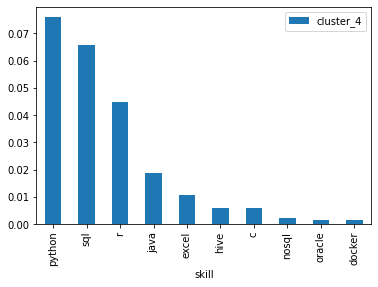

In [ ]:
cluster_10=cluster_2.iloc[0:10,:]
ax = cluster_10.plot.bar(x='skill',y='cluster_4')

In [ ]:
# New dataframe to hold k values (# of clusters) and average dissimilarities
k_dissim_df = pd.DataFrame()
k_dissim_df['k'] = [k for k in range(1, 15)]

In [ ]:
# NOTE: This cell takes about 15 minutes to run

# List of average dissimilarities for each k (# of clusters)
avg_dissims = []

for k in range(1, 15):
  print(f'Cluster size: {k}')

  # Create KModes for k clusters and 20 tries
  km_huang = KModes(n_clusters=k, init="Huang", n_init=10, verbose=0, random_state=25, n_jobs=-5)

  # Fit model using data
  huang_clusters = km_huang.fit_predict(encoded_skills)

  # Convert data to numpy array
  encoded_skills_np = encoded_skills.to_numpy()

  # Array of matching dissimilarities for each entry
  dissims = []

  # Compute matching dissimilarity between each entry and its centroid
  for i in range(0, len(huang_clusters)):
    entry = encoded_skills_np[i]
    cluster_num = huang_clusters[i]
    centroid = km_huang.cluster_centroids_[cluster_num]
    dissims.append(np.sum(entry != centroid, axis=0))

  # Append average dissimilarity to list
  avg_dissims.append(sum(dissims) / len(dissims))

k_dissim_df['avg_dissim'] = avg_dissims
k_dissim_df

Cluster size: 1
Cluster size: 2
Cluster size: 3
Cluster size: 4
Cluster size: 5
Cluster size: 6
Cluster size: 7
Cluster size: 8
Cluster size: 9
Cluster size: 10
Cluster size: 11
Cluster size: 12
Cluster size: 13
Cluster size: 14


,k,avg_dissim
0,1,3.848497
1,2,3.224578
2,3,2.892960
3,4,2.778921
4,5,2.629889
5,6,2.596748
6,7,2.520379
7,8,2.419103
8,9,2.364553
9,10,2.297859


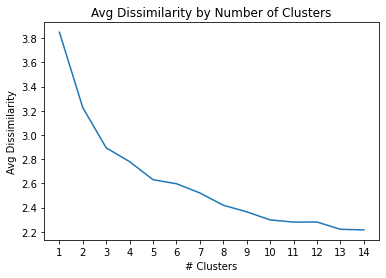

In [ ]:
# Plot for elbow method
plt.title('Avg Dissimilarity by Number of Clusters')
plt.xlabel('# Clusters', fontsize=10)
plt.ylabel('Avg Dissimilarity', fontsize=10)
plt.plot(k_dissim_df['k'], k_dissim_df['avg_dissim'])
plt.xticks(np.arange(1, 15, 1));

# **Visualizations**

In [ ]:
skills_freq = pd.DataFrame()
skills_freq['skills'] = list(skills)
skills_freq['freq'] = skills_df[list(skills)].sum().values
skills_freq = skills_freq.sort_values(by=['freq'], ascending=False)

skills_freq.transpose()

In [ ]:
n_skills = 27
plt.figure(figsize=(20, 10))
plt.bar(skills_freq.head(n_skills)['skills'], skills_freq.head(n_skills)['freq'])
plt.xlabel('Skills', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.xticks(skills_freq['skills'].head(n_skills), rotation='vertical', fontsize=30)
plt.yticks(np.arange(0, 3000, 250), fontsize=30);

In [ ]:
n_skills = 26
plt.figure(figsize=(20, 10))
plt.bar(skills_freq.tail(n_skills)['skills'], skills_freq.tail(n_skills)['freq'])
plt.xlabel('Skills', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.xticks(skills_freq['skills'].tail(n_skills), rotation='vertical', fontsize=30)
plt.yticks(np.arange(0, 130, 10), fontsize=30);

In [ ]:
km_huang_vis = KModes(n_clusters=5, init="Huang", n_init=10, verbose=0, random_state=25)
huang_clusters_vis = km_huang_vis.fit_predict(encoded_skills)
freq_cluster = np.unique(huang_clusters_vis, return_counts=True)
freq_cluster

(array([0, 1, 2, 3, 4], dtype=uint16), array([1580, 1661,  748,  437,  432]))

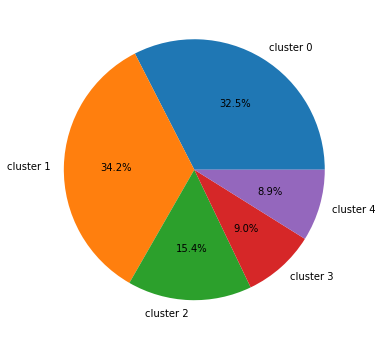

In [ ]:
freq_cluster = list(freq_cluster)
freq_cluster[0] = ["cluster %d" % i for i in range(0, 5)]
plt.figure(figsize=(6, 6))
plt.pie(freq_cluster[1], labels=freq_cluster[0], autopct='%1.1f%%');

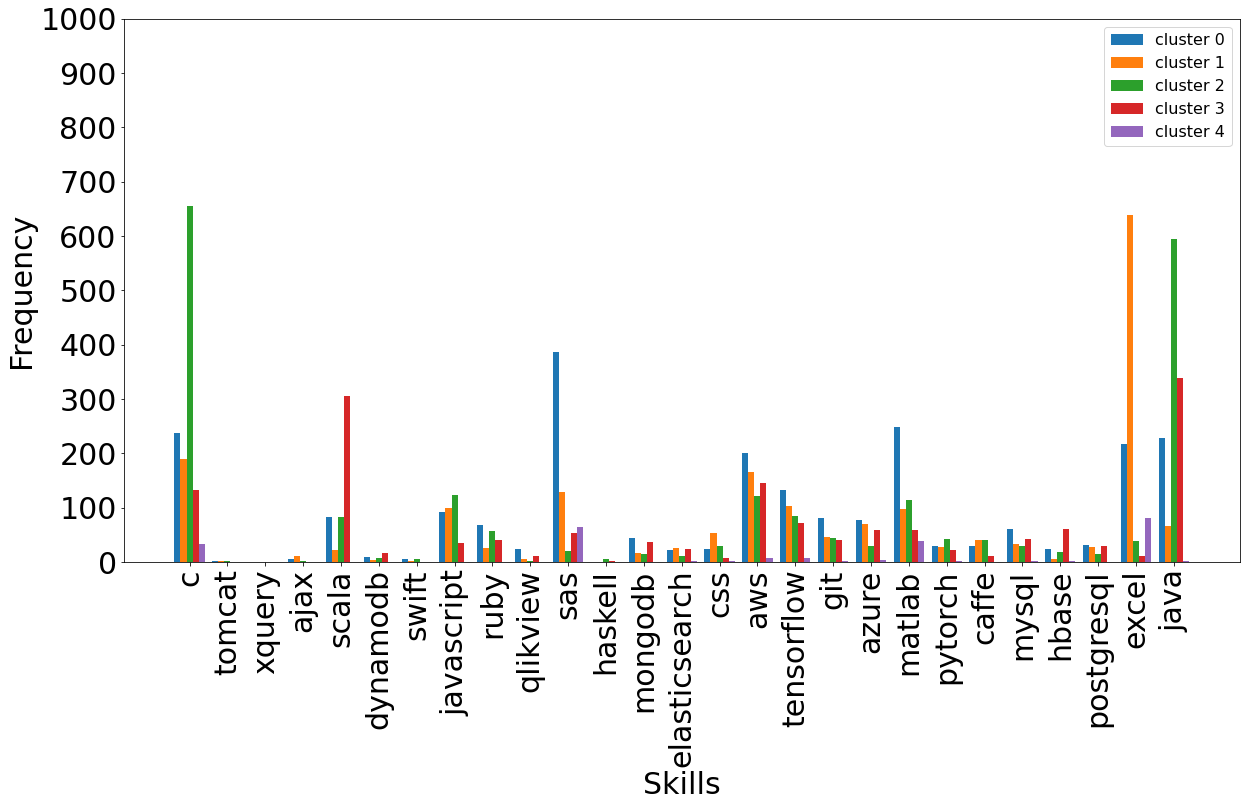

In [ ]:
cluster_freq_skills = []
for i in range(0, 5):
  cluster_freq_skills.append(skills_df[list(skills)][huang_clusters_vis == i].sum().values)

n_skills = 27

plt.figure(figsize=(20, 10))
plt.xlabel('Skills', fontsize=30)
plt.ylabel('Frequency', fontsize=30)

def subbarchart(X, vals, width):
  n = len(vals)
  _X = np.arange(len(X))
  for i in range(n):
      plt.bar(_X - width/2. + i / float(n) * width, vals[i], width=width / float(n), align="edge", label='cluster %d' % i)   
  plt.xticks(_X, X, rotation='vertical', fontsize=30)
  plt.yticks(np.arange(0, 1100, 100), fontsize=30);
  plt.legend(fontsize=16)

c_n_skills = []
for c in cluster_freq_skills:
  c_n_skills.append(c[:n_skills])

subbarchart(list(skills)[:n_skills], c_n_skills, 0.8)
plt.show();

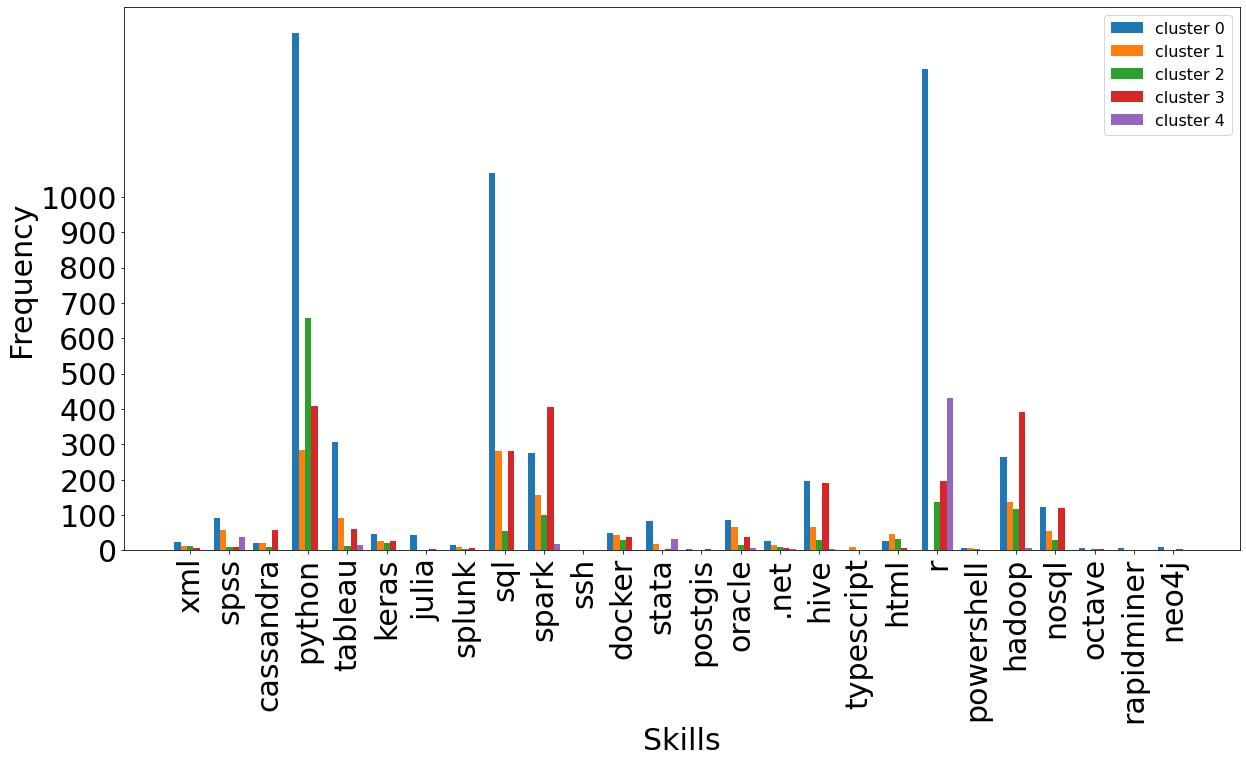

In [ ]:
c_n_skills = []
for c in cluster_freq_skills:
  c_n_skills.append(c[n_skills:])

plt.figure(figsize=(20, 10))
plt.xlabel('Skills', fontsize=30)
plt.ylabel('Frequency', fontsize=30)

subbarchart(list(skills)[n_skills:], c_n_skills, 0.8)
plt.show();

In [ ]:
?KModes



```
# This is formatted as code
```

# Selection of Title

In [ ]:
skills_df['class']=list(huang_clusters_vis)
skills_df.shape

(4858, 56)

In [ ]:
skills_df['tokenized_title_join']=position_df['tokenized_title_join']
skills_df.shape

(4858, 57)

In [ ]:
for i in range(5):
  df_class = pd.DataFrame()
  df_class=skills_df[skills_df['class']==i]
  print('cluster',i,df_class.shape)
  all_titles=[]
  for sentence in df_class['tokenized_title_join']:
    sentence_doc = nlp(sentence)

    for chunk in sentence_doc.noun_chunks:
      all_titles.append(chunk)
  title_df = pd.DataFrame()
  title_df['title'] = all_titles
  title_df['title_join'] = [' '.join(map(str, l)) for l in title_df['title']]
  print(title_df['title_join'].value_counts().head())
  print()

cluster 0 (1580, 57)
Data Scientist           289
Senior Data Scientist     77
Sr                        62
Data Engineer             24
Data Science              22
Name: title_join, dtype: int64

cluster 1 (1661, 57)
Data Scientist      65
Sr                  64
Research Analyst    35
Manager             22
Machine Learning    19
Name: title_join, dtype: int64

cluster 2 (748, 57)
Software Engineer                42
Sr                               39
Data Scientist                   35
Software Development Engineer    25
Machine Learning                 25
Name: title_join, dtype: int64

cluster 3 (437, 57)
Data Scientist               64
Data Engineer                35
Sr                           26
Senior Data Scientist        22
Machine Learning Engineer    19
Name: title_join, dtype: int64

cluster 4 (432, 57)
Data Scientist         14
Principal Scientist    13
Sr                     13
Senior Scientist        9
Scientist               9
Name: title_join, dtype: int64



In [ ]:
df_original['position'].value_counts()

Data Scientist                                                351
Senior Data Scientist                                          96
Research Analyst                                               64
Data Engineer                                                  60
Machine Learning Engineer                                      56
                                                             ... 
AWS Americas Business Analytics & Sales Insights Leader         1
Genomic Data Scientist                                          1
Technical Lead                                                  1
Machine Learning Researcher - Audio/Speech/Computer Vision      1
Sr./Research Associate, Delivery Innovation                     1
Name: position, Length: 5242, dtype: int64